In [2]:
import os
import sys
import numpy as np
import pandas as pd
import requests

#!pip install apimoex
import apimoex

sys.path.append(os.getcwd())
from ops import *
from simulator import Simulator

In [3]:
HISTORY_START_DATE = '2014-07-01'
DATA_DIR = 'C:/Users/eliza/homework_Monte_Carlo/moex_data'
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
if not os.path.exists(os.path.join(DATA_DIR,'spot')):
    os.mkdir(os.path.join(DATA_DIR,'spot'))

In [11]:
session = requests.Session()

In [12]:
securities = pd.DataFrame(apimoex.get_board_securities(session))

In [ ]:
for ticker in securities.SECID:
    if os.path.exists(os.path.join(DATA_DIR,'spot',f'{ticker}.parquet')):
        continue
    sys.stdout.write(ticker)
    sys.stdout.flush()
    data = apimoex.get_board_candles(session,ticker,10,HISTORY_START_DATE,'2022-11-30')
    if len(data):
        pd.DataFrame(data).set_index('begin').to_parquet(
            os.path.join(DATA_DIR,'spot',f'{ticker}.parquet'),
            engine='pyarrow',compression='brotli'
        )
    sys.stdout.write(' : done\n')
    sys.stdout.flush()

In [4]:
sim = Simulator(DATA_DIR)

In [5]:
sim.data['spot'].keys()

dict_keys(['open', 'close', 'high', 'low', 'value'])

In [6]:
close = sim.data['spot']['close'].ffill(limit=6*9*22)
rub_volume = sim.data['spot']['value'].fillna(0)

In [7]:
close.head()

,ABRD,ACKO,AFKS,AFLT,AGRO,AKRN,ALRS,AMEZ,APTK,AQUA,...,WTCM,WTCMP,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
2014-07-01 10:00:00,NaN,NaN,45.158,56.32,NaN,1231.1,42.001,6.251,14.20,NaN,...,NaN,NaN,NaN,NaN,NaN,1238.9,NaN,NaN,NaN,NaN
2014-07-01 10:10:00,NaN,NaN,45.090,56.36,NaN,1238.4,42.200,6.386,14.20,NaN,...,NaN,NaN,NaN,NaN,NaN,1225.0,NaN,NaN,NaN,NaN
2014-07-01 10:20:00,NaN,NaN,45.009,56.58,NaN,1238.4,42.160,6.386,14.22,NaN,...,NaN,NaN,NaN,NaN,NaN,1220.0,NaN,NaN,NaN,NaN
2014-07-01 10:30:00,NaN,NaN,45.232,56.69,NaN,1231.6,42.243,6.386,14.22,NaN,...,NaN,NaN,NaN,NaN,NaN,1230.0,NaN,NaN,NaN,NaN
2014-07-01 10:40:00,135.53,NaN,45.114,56.46,NaN,1231.6,42.202,6.386,14.21,NaN,...,NaN,NaN,NaN,NaN,NaN,1220.2,NaN,NaN,NaN,NaN


In [8]:
weights = close.rolling(6*9).mean()/close
result = sim.run_weights(weights,universe_size=50,delay=0)
#print(result)
sim.show_result(result)

avg daily tvr           = 710.79%
annualized ret          = 125.81%
ir                      = 0.4152
annualized sharpe ratio = 7.93


In [9]:
sim.universe['spot'][50]

,ABRD,ACKO,AFKS,AFLT,AGRO,AKRN,ALRS,AMEZ,APTK,AQUA,...,WTCM,WTCMP,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
2014-07-01 10:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-07-01 10:10:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-07-01 10:20:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-07-01 10:30:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-07-01 10:40:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 18:00:00,False,False,True,True,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2022-11-30 18:10:00,False,False,True,True,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2022-11-30 18:20:00,False,False,True,True,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2022-11-30 18:30:00,False,False,True,True,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


avg daily tvr           = 2851.88%
annualized ret          = 33.43%
ir                      = 0.1886
annualized sharpe ratio = 3.6


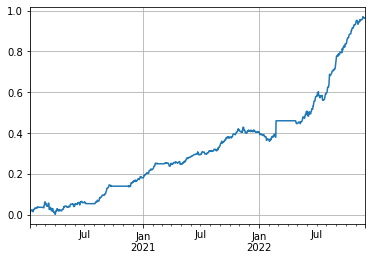

In [10]:
weights = rub_volume/rub_volume.rolling(6*9*5).mean()
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

In [ ]:
weights = ts_rank(rub_volume,6*9*5)
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

# Zadanie

In [11]:
weights=rub_volume.rolling(9).mean()/rub_volume.rolling(45).mean()

avg daily tvr           = 669.54%
annualized ret          = 12.06%
ir                      = 0.0869
annualized sharpe ratio = 1.66


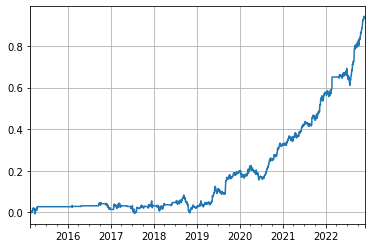

In [12]:
result = sim.run_weights(weights,max_weight=0.1,universe_size=25,delay=0)
sim.show_result(result)

avg daily tvr           = 786.31%
annualized ret          = 17.12%
ir                      = 0.1259
annualized sharpe ratio = 2.41


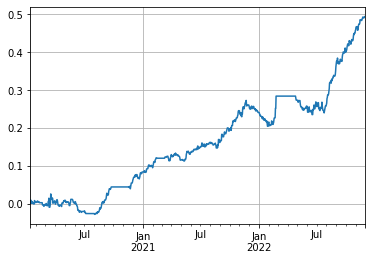

In [13]:
result = sim.run_weights(weights,max_weight=0.05,universe_size=50,delay=0)
sim.show_result(result)

In [33]:
weights

,ABRD,ACKO,AFKS,AFLT,AGRO,AKRN,ALRS,AMEZ,APTK,AQUA,...,WTCM,WTCMP,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
2014-07-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01 10:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 18:00:00,1.157011,NaN,0.799806,0.693316,1.200070,0.115181,0.260286,1.303480,2.569781,0.369827,...,5.754293,0.0,0.110572,0.000000,1.144388,0.188943,12.924997,0.000000,0.79816,0.000000
2022-11-30 18:10:00,1.061437,NaN,0.713208,4.671738,0.034998,0.161637,1.889567,0.090073,2.799870,0.024261,...,1.049755,0.0,0.000000,0.640251,0.000000,0.168203,8.707111,10.916732,0.00000,0.989641
2022-11-30 18:20:00,0.614602,NaN,0.809845,3.246458,0.192851,2.064818,0.619894,0.090781,0.065208,0.567847,...,0.262184,0.0,0.000000,0.000000,0.000000,0.113790,8.141438,0.000000,0.00000,0.000000
2022-11-30 18:30:00,0.896123,NaN,0.391831,0.135116,0.544275,1.961954,1.177224,0.783253,0.029610,3.049512,...,0.000000,0.0,0.000000,0.000000,0.000000,0.160313,0.000000,2.337562,0.00000,0.000000


avg daily tvr           = 667.19%
annualized ret          = 11.93%
ir                      = 0.1158
annualized sharpe ratio = 2.21


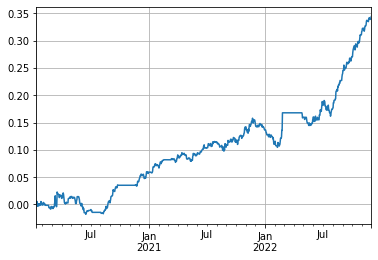

In [14]:
result = sim.run_weights(weights,max_weight=0.02,universe_size=50,delay=0)
sim.show_result(result)